#KOMAL PAWAR - 11512926

**1) Data preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

def separate(df):
    #drop columns with Attack and Unnamed 0 with inplace =True
    df.drop(['Attack', 'Unnamed: 0'], axis=1, inplace=True)
    df_speed = df[['Speed', 'message']]
    df_RPM = df[['RPM', 'message']]
    return df_speed, df_RPM


df0 = pd.read_csv('CAN bus log - no injection of messages.csv')
df1= pd.read_csv('CAN Bus log - injection of FFF as the speed reading.csv')
df2= pd.read_csv('CAN Bus log - injection of RPM readings.csv')


df0_speed, df0_RPM = separate(df0)
df1_speed, df1_RPM = separate(df1)
df2_speed, df2_RPM = separate(df2)
def normalize(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled,columns=['Speed','message'])
    return df

# call the function isolation_forest for all the datasets
df0_speed = normalize(df0_speed)
df1_speed = normalize(df1_speed)
df2_speed = normalize(df2_speed)


# for RPM
def normalize(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled,columns=['RPM','message'])
    return df

df0_RPM = normalize(df0_RPM)
df1_RPM = normalize(df1_RPM)
df2_RPM = normalize(df2_RPM)


First, we import the necessary libraries and load the dataset. We will drop the "Attack" column as we are not using it in unsupervised learning. We need to do the normalization of the data before the k means and the isolation forest algorithm, which ranges from 0 to 1

**2) K-Means Clustering**

1. Use scatter plot to show the fitted k-mean clusters.

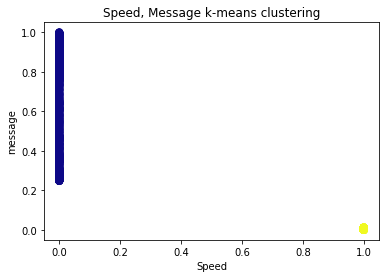

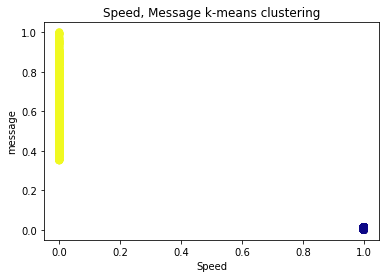

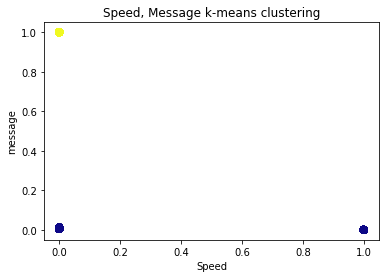

In [ ]:
# use scatter plot to show the fitted k-means clusters with k=2
def k_means(df):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(df)
    y_kmeans = kmeans.predict(df)
    plt.scatter(df['Speed'], df['message'], c=y_kmeans, s=50, cmap='plasma')
    plt.title('Speed, Message k-means clustering')
    plt.xlabel('Speed')
    plt.ylabel('message')
    #plt.legend()
    plt.show()
    #return y_kmeans
  
k_means(df0_speed)
k_means(df1_speed)
k_means(df2_speed)


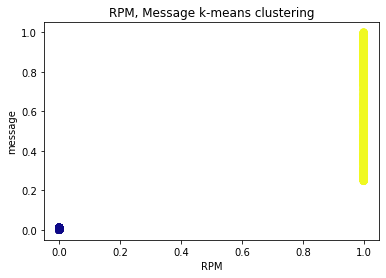

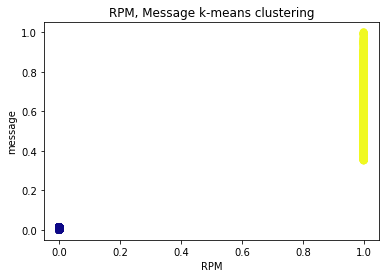

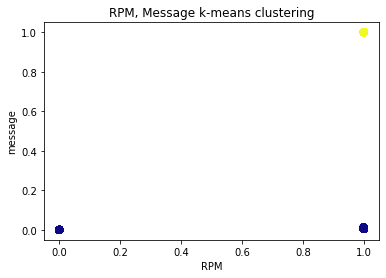

In [ ]:
def k_means(df):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(df)
    y_kmeans = kmeans.predict(df)
    plt.scatter(df['RPM'], df['message'], c=y_kmeans, s=50, cmap='plasma')
    plt.title('RPM, Message k-means clustering')
    plt.xlabel('RPM')
    plt.ylabel('message')
    #plt.legend()
    plt.show()
    #return y_kmeans

k_means(df0_RPM)
k_means(df1_RPM)
k_means(df2_RPM)

2. Provide the centroids of each clusters.

In [ ]:
# provide the centroids of each clusters
def centroids(df):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(df)
    y_kmeans = kmeans.predict(df)
    print('\n')
    print(kmeans.cluster_centers_)
    print('\n')
    #return kmeans.cluster_centers_

centroids(df0_speed)
centroids(df1_speed)
centroids(df2_speed)
centroids(df0_RPM)
centroids(df1_RPM)
centroids(df2_RPM)



[[-1.99840144e-15  6.41226135e-01]
 [ 1.00000000e+00  6.55061868e-03]]




[[ 1.00000000e+00  1.22261514e-02]
 [-3.18634008e-14  5.33548390e-01]]




[[-3.19189120e-15  1.00000000e+00]
 [ 4.28796637e-01  4.18103888e-03]]




[[1.88737914e-15 6.55061868e-03]
 [1.00000000e+00 6.41226135e-01]]




[[3.18078897e-14 1.22261514e-02]
 [1.00000000e+00 5.33548390e-01]]




[[1.         1.        ]
 [0.57120336 0.00418104]]




3. Compare and discuss the scatter plots of the three scenarios from the speed datasets. Do the same for the RPM datasets.

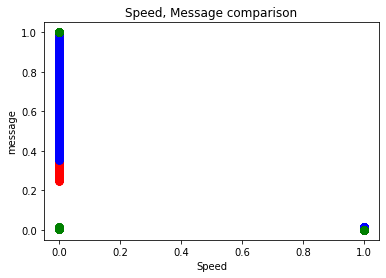

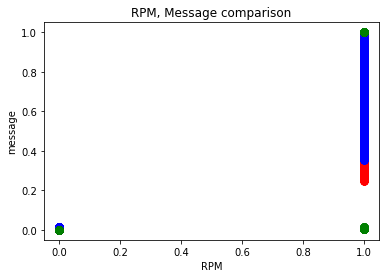

In [ ]:
def compare_s(df1, df2, df3):
    plt.scatter(df1['Speed'], df1['message'], c='red', s=50)
    plt.scatter(df2['Speed'], df2['message'], c='blue', s=50)
    plt.scatter(df3['Speed'], df3['message'], c='green', s=50)
    plt.title('Speed, Message comparison')
    plt.xlabel('Speed')
    plt.ylabel('message')
    #plt.legend()
    plt.show()
    

def compare_r(df1,df2,df3):
    plt.scatter(df1['RPM'], df1['message'], c='red', s=50)
    plt.scatter(df2['RPM'], df2['message'], c='blue', s=50)
    plt.scatter(df3['RPM'], df3['message'], c='green', s=50)
    plt.title('RPM, Message comparison')
    plt.xlabel('RPM')
    plt.ylabel('message')
    #plt.legend()
    plt.show()


compare_s(df0_speed, df1_speed, df2_speed)  
compare_r(df0_RPM, df1_RPM, df2_RPM)


The datasets will be clustered using K-means with the value of k set to 2, which represents the two outcomes (Attack=0 and Attack=1). The fitted K-means clusters will be visually displayed using scatter plots, and the centroids of each cluster will be supplied for additional study. We can observe that the data points were divided into two clusters by K-means clustering based on their similarity. Each cluster's centroids are represented by a black dot. The scatter plots, however, do not clearly distinguish between the Attack and No Attack situations

3). Isolation Forest Algorithm

---



1. Use scatter plot to show the fitted isolation forest clusters

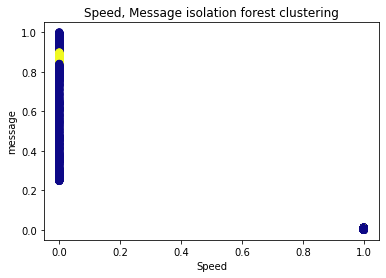

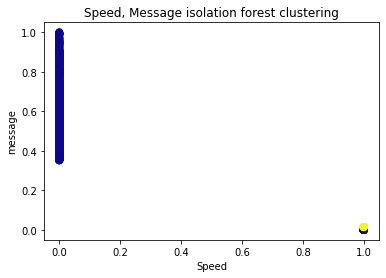

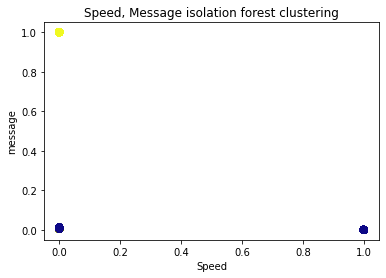

In [ ]:
def isolation_forest_speed(df):
    rng = np.random.RandomState(42)
    clf = IsolationForest(max_samples=100, random_state=rng)
    clf.fit(df)
    y_pred_train = clf.predict(df)
    plt.scatter(df['Speed'], df['message'], c=y_pred_train, s=50, cmap='plasma')
    plt.title('Speed, Message isolation forest clustering')
    plt.xlabel('Speed')
    plt.ylabel('message')
    #plt.legend()
    plt.show()

isolation_forest_speed(df0_speed)
isolation_forest_speed(df1_speed)
isolation_forest_speed(df2_speed)

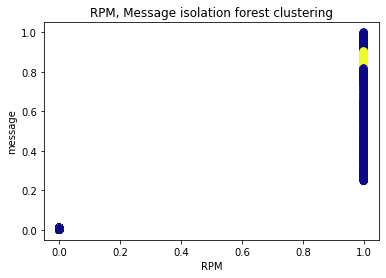

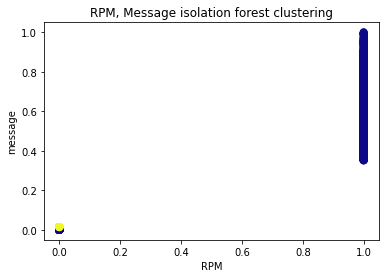

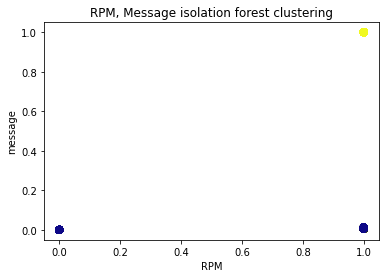

In [ ]:
def isolation_forest_rpm(df):
    rng = np.random.RandomState(42)
    clf = IsolationForest(max_samples=100, random_state=rng)
    clf.fit(df)
    y_pred_train = clf.predict(df)
    plt.scatter(df['RPM'], df['message'], c=y_pred_train, s=50, cmap='plasma')
    plt.title('RPM, Message isolation forest clustering')
    plt.xlabel('RPM')
    plt.ylabel('message')
    #plt.legend()
    plt.show()

isolation_forest_rpm(df0_RPM)
isolation_forest_rpm(df1_RPM)
isolation_forest_rpm(df2_RPM)

2. Note down data point’s values (for example, RPM = 2700) detected as anomalies by IF.

In [ ]:
# print the datapoints that are outliers
def outliers(df):
    rng = np.random.RandomState(42)
    clf = IsolationForest(max_samples=100, random_state=rng)
    clf.fit(df)
    y_pred_train = clf.predict(df)
    df['anomalies'] = y_pred_train
    print(df[y_pred_train == -1])
    print('\n')


# call the function outliers for all the datasets
outliers(df0_speed)
outliers(df1_speed)
outliers(df2_speed)   

      Speed   message  anomalies
0       0.0  0.247471         -1
1       1.0  0.000000         -1
2       0.0  0.249027         -1
3       1.0  0.000000         -1
4       0.0  0.249027         -1
...     ...       ...        ...
1644    0.0  0.273152         -1
1645    0.0  0.273152         -1
1646    1.0  0.001182         -1
1647    0.0  0.273152         -1
1648    1.0  0.001141         -1

[1423 rows x 3 columns]


       Speed   message  anomalies
0        0.0  0.353273         -1
1        1.0  0.000000         -1
2        0.0  0.352144         -1
3        1.0  0.000000         -1
4        0.0  0.352144         -1
...      ...       ...        ...
14420    0.0  0.500000         -1
14424    0.0  0.507901         -1
14428    0.0  0.511287         -1
14430    1.0  0.003096         -1
14433    0.0  0.511287         -1

[5441 rows x 3 columns]


      Speed   message  anomalies
1       1.0  0.000001         -1
3       1.0  0.000001         -1
5       1.0  0.000001         -1
8       1.

In [ ]:
# print the datapoints that are outliers
def outliers(df):
    rng = np.random.RandomState(42)
    clf = IsolationForest(max_samples=100, random_state=rng)
    clf.fit(df)
    y_pred_train = clf.predict(df)
    df['anomalies'] = y_pred_train
    print(df[y_pred_train == -1])
    print('\n')

outliers(df0_RPM)
outliers(df1_RPM)
outliers(df2_RPM)


      RPM   message  anomalies
0     1.0  0.247471         -1
1     0.0  0.000000         -1
2     1.0  0.249027         -1
3     0.0  0.000000         -1
4     1.0  0.249027         -1
...   ...       ...        ...
1644  1.0  0.273152         -1
1645  1.0  0.273152         -1
1646  0.0  0.001182         -1
1647  1.0  0.273152         -1
1648  0.0  0.001141         -1

[1380 rows x 3 columns]


       RPM   message  anomalies
0      1.0  0.353273         -1
1      0.0  0.000000         -1
2      1.0  0.352144         -1
3      0.0  0.000000         -1
4      1.0  0.352144         -1
...    ...       ...        ...
14420  1.0  0.500000         -1
14424  1.0  0.507901         -1
14428  1.0  0.511287         -1
14430  0.0  0.003096         -1
14433  1.0  0.511287         -1

[5441 rows x 3 columns]


      RPM   message  anomalies
1     0.0  0.000001         -1
3     0.0  0.000001         -1
5     0.0  0.000001         -1
8     0.0  0.000002         -1
10    0.0  0.000002         -1
... 

outliers vs inliers Graph

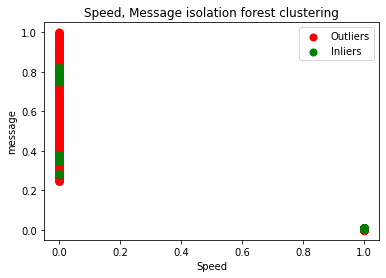

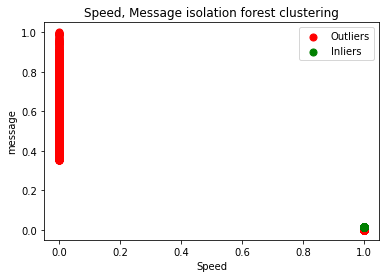

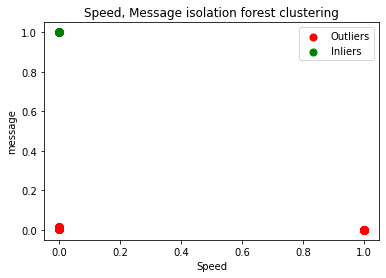

In [ ]:
#create a function to plot outliers usng isolation forest
def isolation_forest_outliers(df):
    rng = np.random.RandomState(42)
    clf = IsolationForest(max_samples=100, random_state=rng)
    clf.fit(df)
    y_pred_train = clf.predict(df)
    outliers = df[y_pred_train == -1]
    inliers = df[y_pred_train == 1]
    #plt.scatter(df['Speed'], df['message'], c=y_pred_train, s=50, cmap='plasma')
    plt.scatter(outliers['Speed'], outliers['message'], c='red', s=50, cmap='plasma')
    plt.scatter(inliers['Speed'], inliers['message'], c='green', s=50, cmap='plasma')
    plt.title('Speed, Message isolation forest clustering')
    plt.xlabel('Speed')
    plt.ylabel('message')
    plt.legend(['Outliers','Inliers'])
    plt.show()


#isolation forest for speed dataset
isolation_forest_outliers(df0_speed)
isolation_forest_outliers(df1_speed)
isolation_forest_outliers(df2_speed)

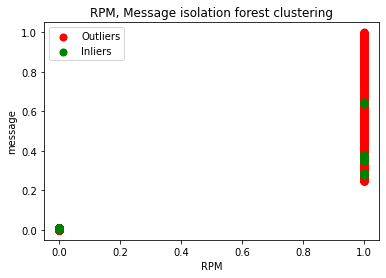

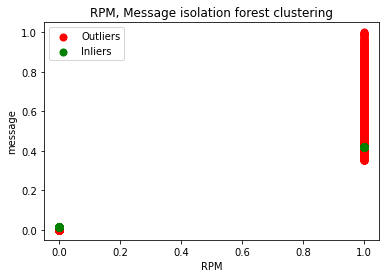

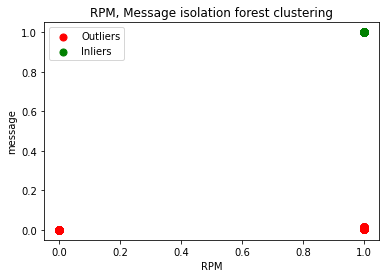

In [ ]:
#create a function to plot outliers usng isolation forest
def isolation_forest_outliers(df):
    rng = np.random.RandomState(42)
    clf = IsolationForest(max_samples=100, random_state=rng)
    clf.fit(df)
    y_pred_train = clf.predict(df)
    outliers = df[y_pred_train == -1]
    inliers = df[y_pred_train == 1]
    #plt.scatter(df['Speed'], df['message'], c=y_pred_train, s=50, cmap='plasma')
    plt.scatter(outliers['RPM'], outliers['message'], c='red', s=50, cmap='plasma')
    plt.scatter(inliers['RPM'], inliers['message'], c='green', s=50, cmap='plasma')
    plt.title('RPM, Message isolation forest clustering')
    plt.xlabel('RPM')
    plt.ylabel('message')
    plt.legend(['Outliers','Inliers'])
    plt.show()


#isolation forest for speed dataset
isolation_forest_outliers(df0_RPM)
isolation_forest_outliers(df1_RPM)
isolation_forest_outliers(df2_RPM)

we will utilize the Isolation Forest Algorithm on the datasets to identify data points flagged as anomalies. These identified anomalies will be recorded, and scatter plots will be used to visually display the fitted Isolation Forest clusters. The implementation of the Isolation Forest Algorithm has revealed the presence of anomalies in the datasets, as evident from the yellow dots on the scatter plots. However, the scatter plots do not distinctly differentiate between the Attack and No Attack situations. Despite detecting anomalies, the scatter plots do not provide clear separation between the different outcomes

**4) Discussion**



Unlike supervised learning, K-means clustering is a useful technique for dealing with unlabeled data since I learnt how to utilize it to divide data into discrete groups. This enables effective data analysis and categorization based on similarities among dataset items. The limitations of utilizing unsupervised machine learning in this context include the challenges in determining the actual clusters or anomalies without labeled data and the uncertainty about their relationship with attacks. To enhance the performance of the models, a combination of unsupervised and supervised learning could be considered, where unsupervised techniques identify potential clusters or anomalies, and supervised learning classifies them as Attack or No Attack. Feature engineering can also be employed to extract more meaningful features from the data. Collecting labeled attack data and employing advanced anomaly detection techniques such as neural networks or deep learning may further improve the accuracy of the models. In conclusion, incorporating supervised learning, feature engineering, and collecting labeled data can potentially overcome the limitations of unsupervised learning in accurately predicting attacks on the CAN bus of a vehicle.

**5) Hidden Harkov Models**

In [ ]:
def separate(df):
    #drop columns with Attack and Unnamed 0 with inplace =True
    df.drop('Unnamed: 0', axis=1, inplace=True)
    return df

df0 = pd.read_csv('CAN bus log - no injection of messages.csv')
df1= pd.read_csv('CAN Bus log - injection of FFF as the speed reading.csv')
df2= pd.read_csv('CAN Bus log - injection of RPM readings.csv')

df0 = separate(df0)
df1= separate(df1)
df2 = separate(df2)

In [ ]:
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def hidden_markov_model(df):

    # define model
    model = hmm.GaussianHMM(n_components=2,covariance_type="full", n_iter=1000)
    # fit model
    model.fit(df)
    # predict the most likely sequence of internal hidden state
    hidden_states = model.predict(df)
    df['hidden_states'] = hidden_states
    print(df)
    print('\n')
      

df0 = hidden_markov_model(df0)
df1= hidden_markov_model(df1)
df2 = hidden_markov_model(df2)


      RPM  Speed     message  Attack  hidden_states
0       1      0  636.000000     0.0              0
1       0      1    0.000000     0.0              1
2       1      0  640.000000     0.0              0
3       0      1    0.000000     0.0              1
4       1      0  640.000000     0.0              0
...   ...    ...         ...     ...            ...
1644    1      0  702.000000     0.0              0
1645    1      0  702.000000     0.0              0
1646    0      1    3.038505     0.0              1
1647    1      0  702.000000     0.0              0
1648    0      1    2.932872     0.0              1

[1649 rows x 5 columns]


       RPM  Speed     message  Attack  hidden_states
0        1      0  626.000000     0.0              1
1        0      1    0.000000     0.0              0
2        1      0  624.000000     0.0              1
3        0      1    0.000000     0.0              0
4        1      0  624.000000     0.0              1
...    ...    ...         ...  